In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler, LabelEncoder 
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('Customers.csv')

In [3]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


In [7]:
data.drop('CustomerID' ,axis = 1, inplace=True)

In [8]:
data.rename(columns={'Genre':'Gender','Annual Income (k$)':'Annual Income','Spending Score (1-100)':'Spending Score'},inplace=True)

In [9]:
data.head()

,Gender,Age,Annual Income,Spending Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
gender_count = data['Gender'].value_counts(normalize=True)
gender_count.to_frame()

,proportion
Gender,
Female,0.56
Male,0.44


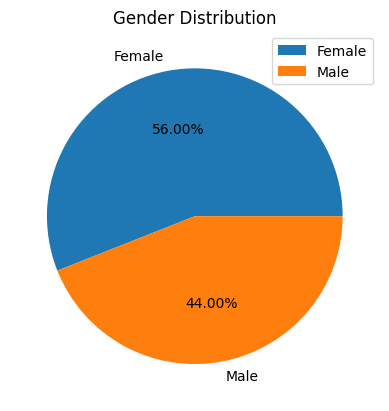

In [11]:
plt.pie(gender_count.values , autopct= '%.2f%%' ,labels= gender_count.index , )
plt.title("Gender Distribution")

plt.legend(loc='best')

In [12]:
from sklearn.preprocessing import  LabelEncoder

label_encode = LabelEncoder()
data.Gender = label_encode.fit_transform(data.Gender)
data

,Gender,Age,Annual Income,Spending Score
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


In [13]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#data[['Age','Annual Income','Spending Score']] = scaler.fit_transform(data[['Age','Annual Income','Spending Score']])

#data.head()

In [14]:
loss = []
cluster_num = []

for i in range(1,12):
    model_k_means = KMeans(n_clusters= i)
    cluster_num.append(i)
    model_k_means.fit(data)
    loss.append(model_k_means.inertia_)

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

Text(0.5, 0, 'num of cluster')

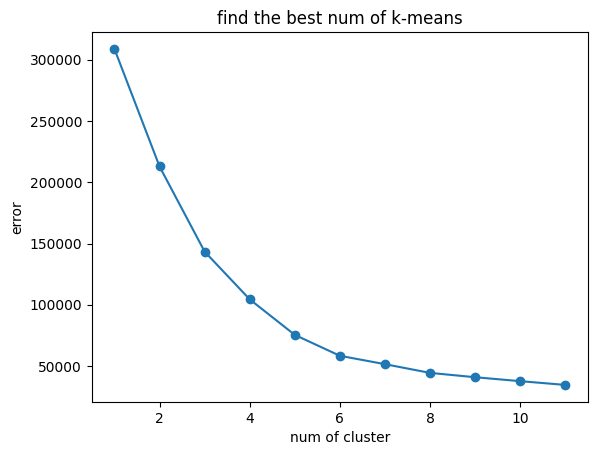

In [15]:
plt.plot(cluster_num , loss , marker = 'o')
plt.title('find the best num of k-means')
plt.ylabel('error')
plt.xlabel('num of cluster')

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

Text(0, 0.5, 'Score')

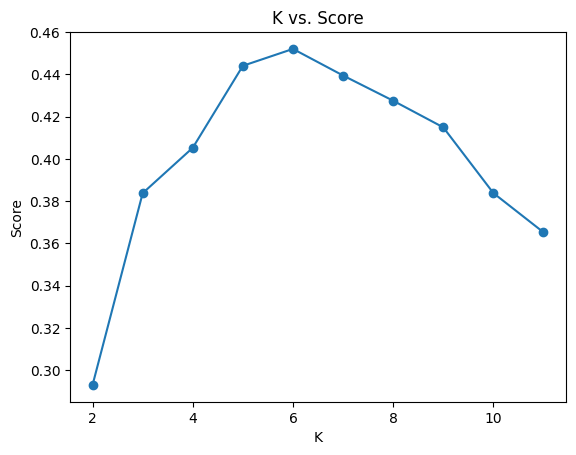

In [16]:
k_with_score = {}
for k in range(2,12):
    model_k_means = KMeans(n_clusters=k, random_state=45)
    model_k_means.fit(data)
    k_with_score[k] = silhouette_score(data, model_k_means.labels_)
    
plt.plot(k_with_score.keys() , k_with_score.values(), marker = 'o')
plt.title('K vs. Score')
plt.xlabel('K')
plt.ylabel('Score')

In [28]:
model_k_means = KMeans(n_clusters= 6 )
model_k_means.fit(data)
data['cluster'] = model_k_means.labels_

C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [29]:
data.sample(5)

,Gender,Age,Annual Income,Spending Score,cluster
186,0,54,101,24,4
82,1,67,54,41,1
103,1,26,62,55,5
70,1,70,49,55,1
76,0,45,54,53,1


In [30]:
data['cluster'].unique()

array([0, 3, 1, 5, 2, 4])

In [27]:
clutser0 = data[ data['cluster'] == 0]
clutser1 = data[ data['cluster'] == 1]
clutser2 = data[ data['cluster'] == 2]
clutser3 = data[ data['cluster'] == 3]

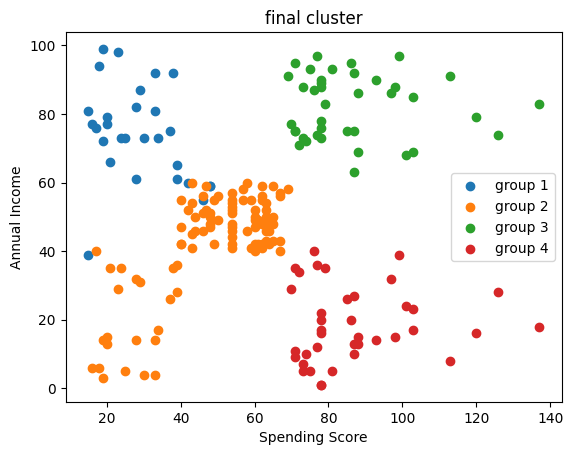

In [21]:
plt.scatter(clutser0['Annual Income'], clutser0['Spending Score'] ,label = 'group 1')
plt.scatter(clutser1['Annual Income'], clutser1['Spending Score'] ,label = 'group 2')
plt.scatter(clutser2['Annual Income'], clutser2['Spending Score'] ,label = 'group 3')
plt.scatter(clutser3['Annual Income'], clutser3['Spending Score'] ,label = 'group 4')

plt.title('final cluster')
plt.ylabel('Annual Income')
plt.xlabel('Spending Score')

plt.legend()
plt.show()

<Axes: ylabel='count'>

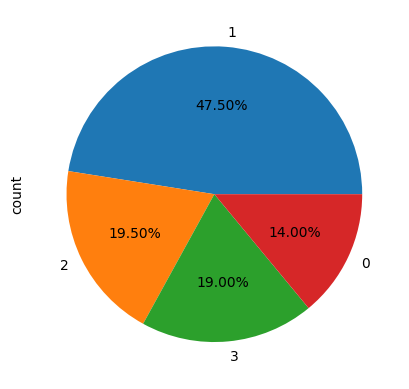

In [22]:
data['cluster'].value_counts().plot.pie(autopct= '%.2f%%')

<Axes: xlabel='cluster', ylabel='count'>

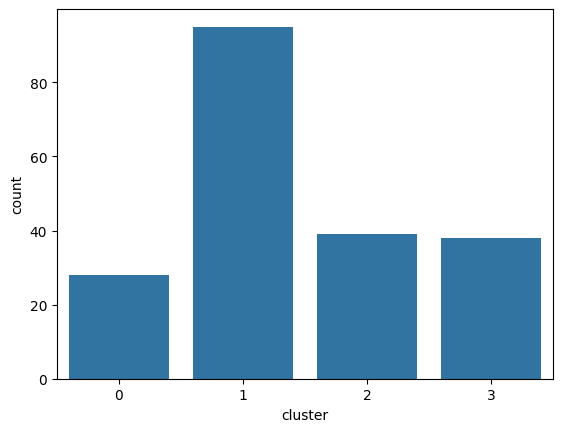

In [23]:
sns.countplot(data= data , x= 'cluster')